# Seeds dataset with KNN
## Yoav Ram

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.classifier import confusion_matrix
from yellowbrick.regressor import prediction_error

import pandas
import sklearn
import yellowbrick

sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

If you had a problem importing Yellowbrick, create a new cell and run the following command in it:
```
!python3 -m pip install yellowbrick
```

# Seeds dataset - classification

[The seeds dataset](https://archive.ics.uci.edu/ml/datasets/seeds) is a classification task consisting in identifying 3 different cultivars of wheat (Kama, Rosa and Canadian) from their seed features.

![wheat](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Naked_and_hulled_wheat.jpg/320px-Naked_and_hulled_wheat.jpg)

Let's start by loading the dataset.

In [3]:
df = pd.read_csv('../data/seeds_dataset.txt', sep='\t')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Notice there are seven numerical features and a single categorical feature, `cultivar`, which specifies the seed class.

We will extract the features to `X` and the class to `y`.

In [4]:
target_name = 'cultivar'
feature_names = list(df.columns)
feature_names.remove(target_name)

X = df[feature_names].values
y = df[target_name].values

**Split the dataset to train and test data** using a random permutation - this is easily done with functions from the `model_selection` module, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

**Import the nearest-neighbor classifier, then create and fit it**.

In [15]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

**Predict the labels (cultivar) for the test data and compare with the real labels.**

In [16]:
y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', classifier.score(X_test, y_test))

[1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 1 1 1 3 1 1 1 2 1 2 1 3 3 2 3 1 2 3 3 3
 2 3 1 3 1 2 3 1 2 2 1 1 2 1 2 3 3 1 1 2 2 2 2 3 2 2 3 1 1 3 1 3 2]
[1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 1 1 1 3 1 1 1 2 2 2 2 3 3 2 3 2 2 3 3 3
 2 1 2 3 1 2 3 1 2 2 1 1 2 1 2 3 3 1 1 2 2 2 2 3 2 2 1 1 1 1 1 3 2]
Accuracy: 0.9


**Plot a confusion matrix** to see which classes are confused between. 
Use [Yellowbrick](https://www.scikit-yb.org/) or [Scikit-learn](https://scikit-learn.org/stable/), both have a good confusion matrix visualizer.

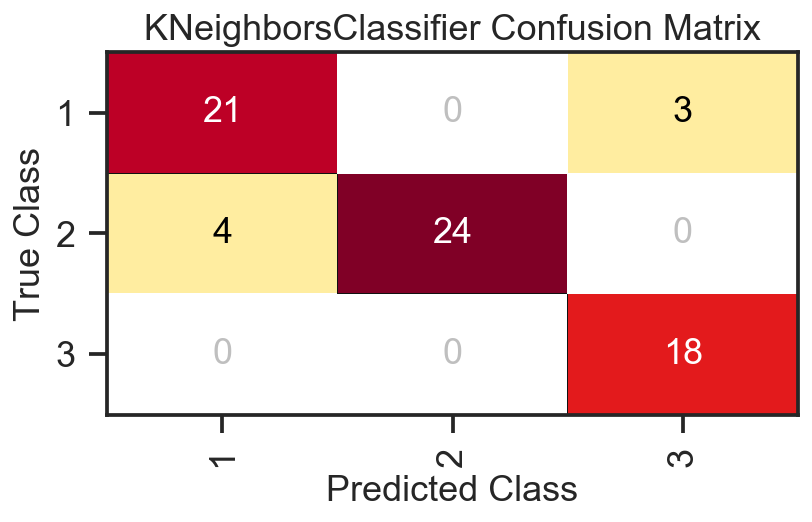

In [19]:
confusion_matrix(classifier, X_train, y_train, X_test, y_test);

Now, **choose just two features out of the seven**, and **plot the classifier decision boundaries** using [Yellowbrick](https://www.scikit-yb.org/en/latest/gallery.html)'s [decision boundaries](https://www.scikit-yb.org/en/latest/api/contrib/boundaries.html#decisionboundaries-vizualizer) visualizer.

In [11]:
X_train, X_test = X_train[:,[3,6]], X_test[:,[3,6]]

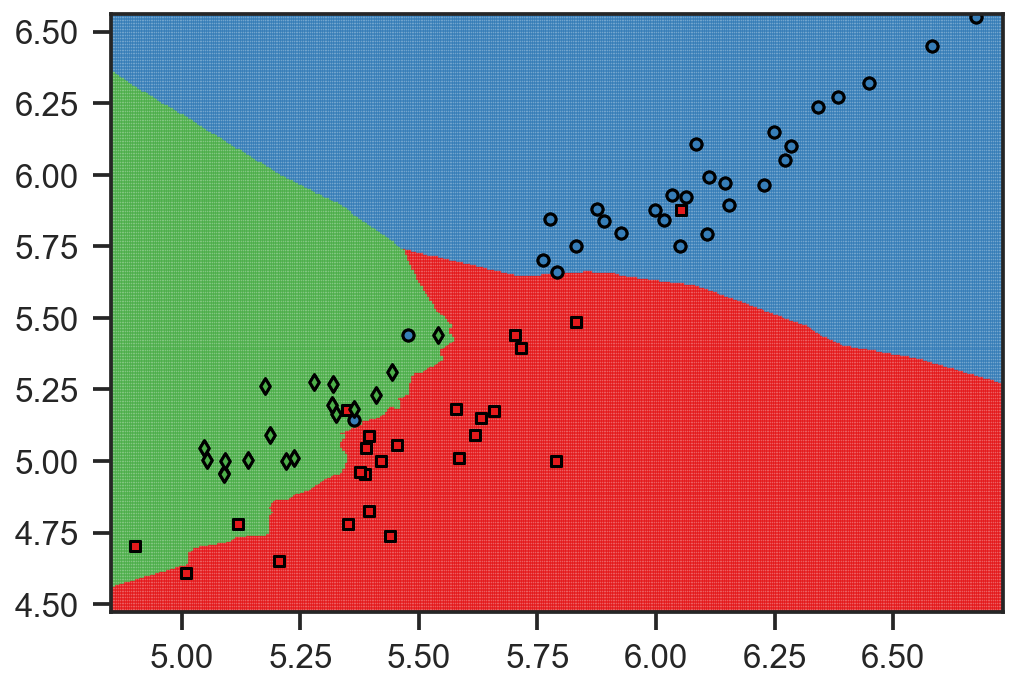

In [12]:
viz = DecisionViz(classifier,
                  markers='o', pcolormesh_alpha=0.7)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
# plt.xlabel(feature_names[3])
# plt.ylabel(feature_names[6]) # commented out so you dont see what I did!

# Regression

The seeds dataset has seven features:
area, perimeter, compactness, kernel_length, kernel_width, asymmetry, and kernel_groove.

**Train a KNN regressor to predict each feature from the other six features, and print the score.**

In [79]:
feature_names = list(df.columns)
feature_names.remove('cultivar')

X = df[feature_names].values

In [90]:
for i, feature in enumerate(feature_names):
    cols = list(range(len(feature_names)))
    cols.remove(i)
    y_ = X[:, i]
    X_ = X[:, cols]
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=0)
    
    regressor = KNeighborsRegressor()
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print('{:20} R2 = {:.2f}'.format(feature, score))

area                 R2 = 0.97
perimeter            R2 = 0.98
compactness          R2 = 0.68
kernel_length        R2 = 0.90
kernel_width         R2 = 0.95
asymmetry            R2 = 0.01
kernel_groove        R2 = 0.81


For the feature with the lowest R2, **plot the prediction error plot using Yellowbrick.**

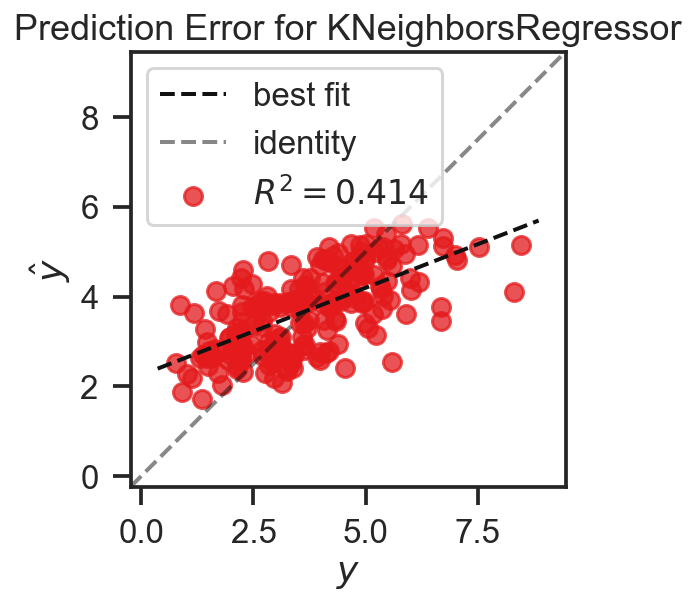

In [94]:
feature_names = list(df.columns)
feature_names.remove('cultivar')
feature_names.remove('asymmetry')

X = df[feature_names].values
y = df['asymmetry'].values

prediction_error(KNeighborsRegressor(), X, y);

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)